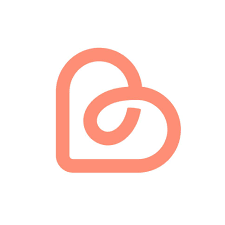
# **Bellabeat Google Capstone Case Study -2**  

#### **Deliverables**  

* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of your analysis
* Supporting visualizations and key findings
* Top high-level content recommendations based on your analysis

#### **Analysis Stages**

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

## **Ask**  

### **Business Task** :  

Analyze smart device usage data in order to gain insight into how consumers use **non-Bellabeat** smart devices. Breakdown can be done into these three questions :-  

* What are some trends in smart device usage?  
* How could these trends apply to Bellabeat customers?  
* How could these trends help influence Bellabeat marketing strategy?  

### **Key Stakeholders** :  

**Urška Sršen**, cofounder and Chief Creative Officer of Bellabeat.
**Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.

## **Prepare**  

###  **Data Source Information** :  

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files under__[license](https://creativecommons.org/publicdomain/zero/1.0/)__   

### **Restraints of Data Set** :  

* Data is outdated for current time scenario as the lifestyle has changed alot from the year 2016. The hypothesis from this analysis will purely be based on the year 2016 habitual patterns.   
* Sample size of 30 users is not representative of the entire population.  
* As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.  

### **Dataset Credibility** :  

The dataset lacks in many aspects like realiablity, originality, comprehensiveness , current, citations. Unfortunately the dataset lacks in every aspect and is not fit for analyzing current day trends. But still for the purpose of case study it's useful.

A credible data source is ROCCC-
* Reliable - Its not much reliable as sample size is small.
* Original - The dataset is third party source (Amazon Mechanical Turk)
* Comprehensive -  dataset seems comprehensive enough and an outcome can be achieved from it.
* Current - time frame is not current.
* Cited - data collected from third party source

For the purpose of analysis I will be using daily_activity and sleep data. The purpose for using these data is to identify the trends and patterns to provide recommendations based on it for **Bellabeat app product**.

In [45]:
# Imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
# Reading all the .csv files for analysis
daily_activity = pd.read_csv("D:\Bellabeat\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
sleep = pd.read_csv("D:\Bellabeat\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


 ## **Process**  
 
 ### **Tools** 
 * Jupyter Notebook
 * Libraries :
 >NumPy
 >Pandas
 >Seaborn
 >Matplotlib
 >Datetime
 
###  **Data Cleaning**

**Checking basic information of all the dataframes**

In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [12]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")
daily_activity["ActivityDate"].head(3)

0   2016-04-12
1   2016-04-13
2   2016-04-14
Name: ActivityDate, dtype: datetime64[ns]

In [16]:
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])
sleep["SleepDay"].head(3)

0   2016-04-12
1   2016-04-13
2   2016-04-15
Name: SleepDay, dtype: datetime64[ns]

**Checking for Missing values**

In [17]:
missing_values_count = daily_activity.isnull().sum()
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [21]:
missing_values_count = sleep.isnull().sum()
missing_values_count[:]

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

**Rearranging column names and data**

In [27]:
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutes', 'TotalHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [29]:
# New column "day_of_the_week" to represent day of the week 
daily_activity["DayOfTheWeek"] = daily_activity["ActivityDate"].dt.day_name()

daily_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [30]:
#New column "TotalMinutes" containing sum of total minutes.
daily_activity["TotalMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalMinutes"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMinutes, dtype: int64

In [31]:
#New column *TotalHours* by converting to hour and round float to two decimal places
daily_activity["TotalHours"] = round(daily_activity["TotalMinutes"] / 60)
daily_activity["TotalHours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHours, dtype: float64

In [32]:
daily_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,TotalMinutes,TotalHours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,24.0


 ## **Analyze**  
 
 **Basic Calculations**

In [34]:
# Total distinct number of Id's in daily_activity DataFrame
daily_activity["Id"].nunique()

33

Discrepancy is that in data description it was detailed as sample size of 30 users but data mentioned is for 33 users

In [35]:
# Total distinct number of Id's in sleep DataFrame
sleep["Id"].nunique()

24

Discrepancy is that the sleep dataframe is lacking in sample size than the detailed sample size of 30

In [39]:
# count,mean,std(standard deviation),minimum,maximum,percentiles(25%, 50%, 75%)
daily_activity.describe().head(10)

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


In [40]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


 ## **Share**
 
 **Creating Viz. to capture insight**

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

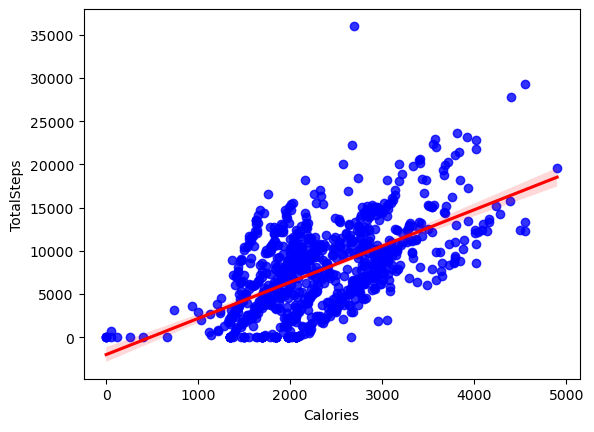

In [60]:
sns.regplot(x="Calories",y="TotalSteps",data=daily_activity,scatter_kws={"color":"blue"},line_kws={"color":"red"},label="Total Steps Vs Calories Burned")

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

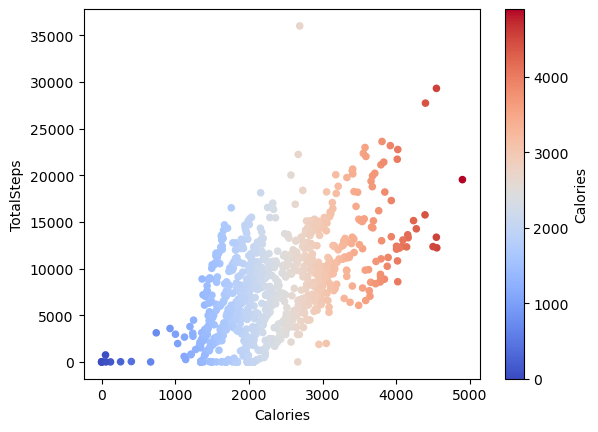

In [54]:
daily_activity.plot.scatter(x="Calories",y="TotalSteps",c="Calories",cmap='coolwarm')

<AxesSubplot:xlabel='count', ylabel='DayOfTheWeek'>

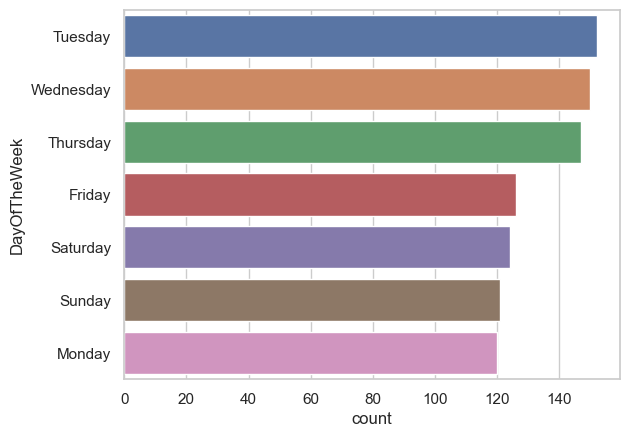

In [67]:
sns.set_theme(style="whitegrid")
sns.countplot(y="DayOfTheWeek",data=daily_activity)

<AxesSubplot:>

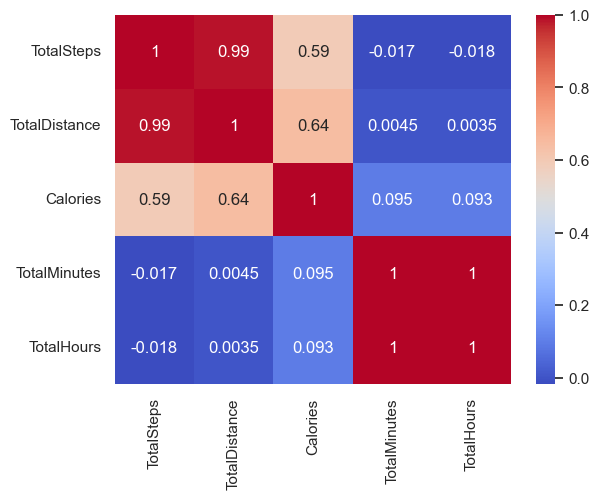

In [81]:
tc=daily_activity.corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [94]:
corr_mat = daily_activity.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

TotalHours    TotalSteps      -0.018152
TotalSteps    TotalHours      -0.018152
              TotalMinutes    -0.017285
TotalMinutes  TotalSteps      -0.017285
TotalHours    TotalDistance    0.003513
dtype: float64

In [97]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr.head()

Calories       TotalSteps       0.591568
TotalSteps     Calories         0.591568
Calories       TotalDistance    0.644962
TotalDistance  Calories         0.644962
               TotalSteps       0.985369
dtype: float64

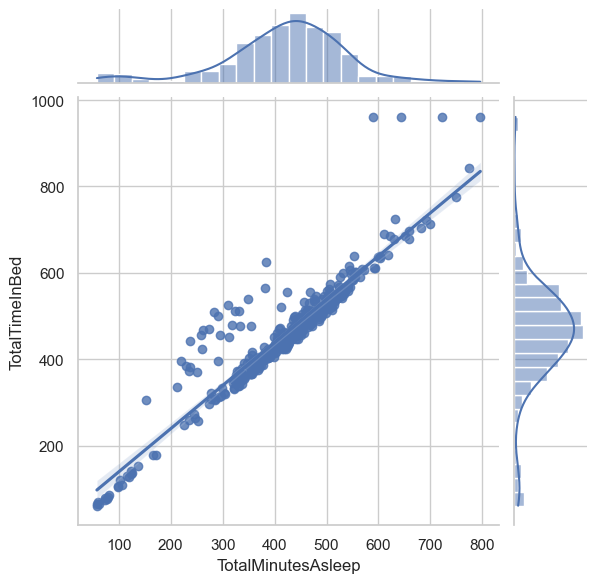

In [93]:
sns.jointplot(x="TotalMinutesAsleep",y="TotalTimeInBed",data=sleep,kind="reg")

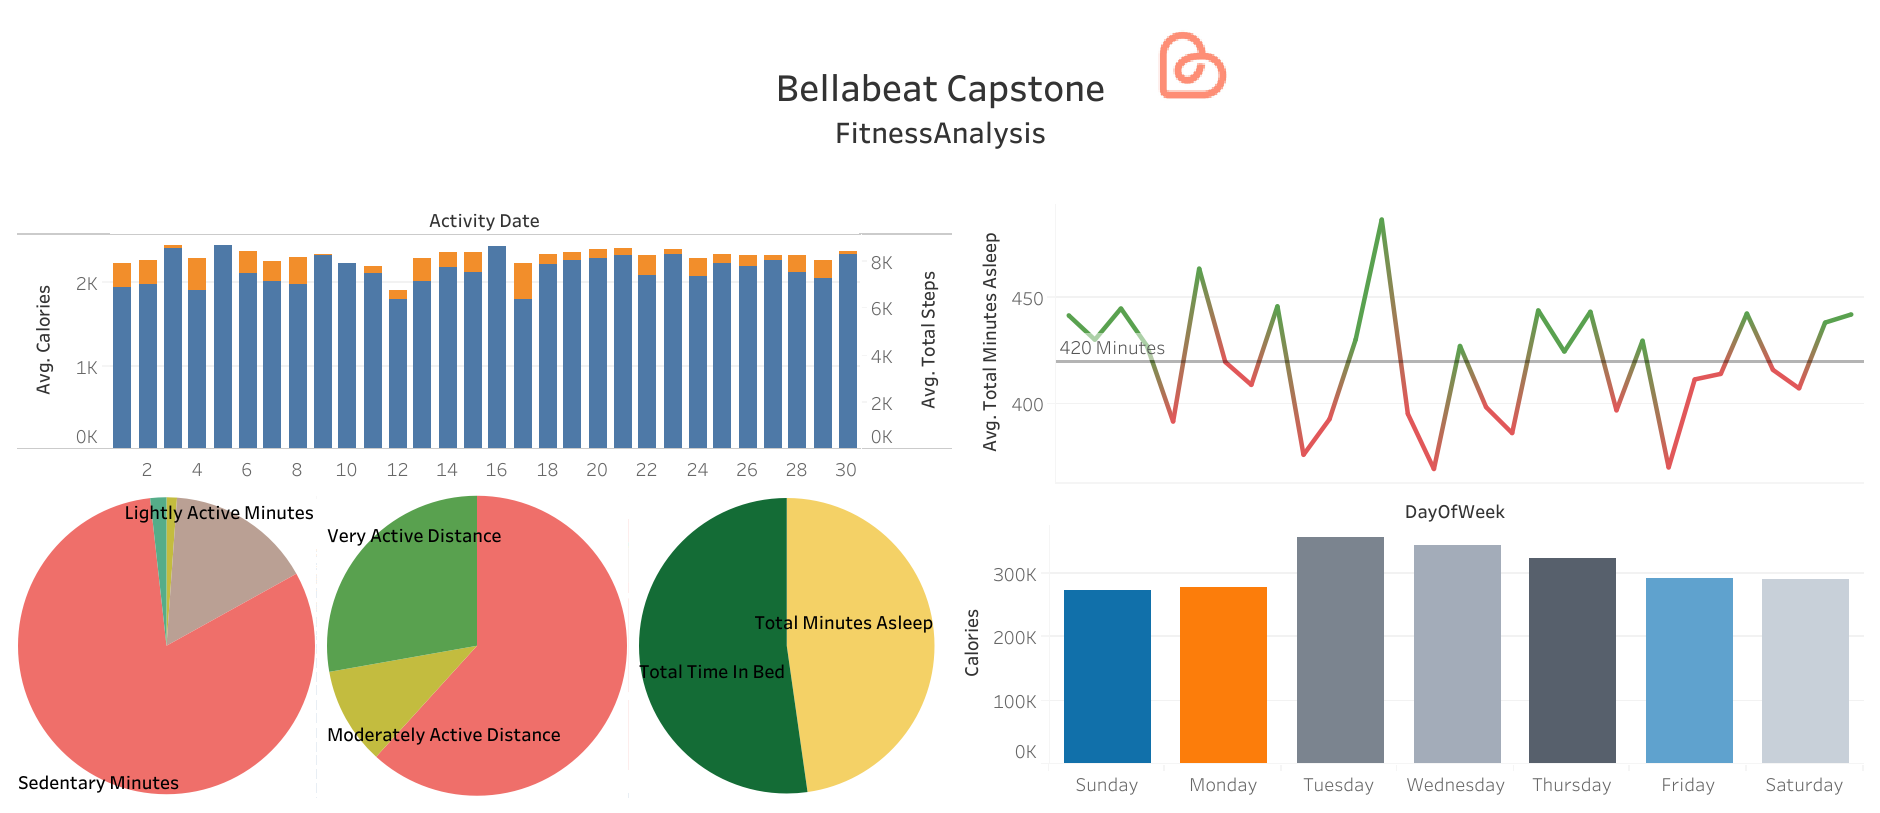

**Observations** :
* Correlation coefficients magnitude is greater for TotalDistance-Calorie and Calorie-TotalSteps.
* Users are not sleeping rightaway during the night.
* Most of the users are taking a sleep of less than 420 Minutes(7 Hrs) which is found to be healthy sleep time in adults.
* Activity levels vary throughout the week.
* Sedentary Minutes constitues a large portion of users when they are awake.
* Healthy step count is found to be 10000 steps per day but users are lacking in daily step count.

 ## **Act**
 
Top three recommendations for Bellabeat app product :

1-Bellabeat app can start by educating their users about sleep pattern, working out, workout intensities and activeness by either blogs notifications.  
2-Bellabeat aap can start providing customized plans for fitness to the users who buy a membership plan.  
3-With respect to tracking Bellabeat app can start taking a user input about their BMI and add options about calorie intake and calorie burned alongside to keep the user informed about their health.   